In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=df7e1a45d4925410a8ba4c0d3e685ca0


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.  Record numbers 1-50 and the set counter - how many sets of 50
record_count = 1
set_count = 1

# Loop through all the cities in our list.
#for i in range(len(cities)):

#Group cities in sets of 50 for logging purposes.
#   if (i % 50 == 0 and i >= 50):
#       set_count += 1
#       record_count = 1
# Create endpoint URL with each city.
#   city_url = url + "&q=" + "i"
    
#i uses the indexing in the cities_list so have to create another for loop to get the city from the cities list
#enumerate method
# Loop through all the cities in the list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes. 
    #If the remainder of the index divided by 50 ==0 and if the index is greater than or equal to 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
      
    # Create endpoint URL with each city.  replace blanks with "+" which finds the weather for the city
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao filipe
Processing Record 2 of Set 1 | ilulissat
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | matara
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | coquimbo
Processing Record 8 of Set 1 | hambantota
Processing Record 9 of Set 1 | samarai
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | flinders
Processing Record 13 of Set 1 | nouadhibou
Processing Record 14 of Set 1 | nome
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | port lincoln
Processing Record 19 of Set 1 | te anau
Processing Record 20 of Set 1 | platteville
Processing Record 21 of Set 1 | dalbandin
Processing Record 22 of Set 1 | zabaykalsk
Processing Record 23 of Set 1 | carnarvon
Proces

Processing Record 42 of Set 4 | chenghai
Processing Record 43 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 44 of Set 4 | otradnoye
Processing Record 45 of Set 4 | pag
Processing Record 46 of Set 4 | galle
Processing Record 47 of Set 4 | mapimi
Processing Record 48 of Set 4 | coihaique
Processing Record 49 of Set 4 | ostrovnoy
Processing Record 50 of Set 4 | adrar
Processing Record 1 of Set 5 | narsaq
Processing Record 2 of Set 5 | mnogovershinnyy
Processing Record 3 of Set 5 | soe
Processing Record 4 of Set 5 | pisco
Processing Record 5 of Set 5 | khotkovo
Processing Record 6 of Set 5 | pangai
Processing Record 7 of Set 5 | cherskiy
Processing Record 8 of Set 5 | akdepe
Processing Record 9 of Set 5 | mahadday weyne
City not found. Skipping...
Processing Record 10 of Set 5 | wanaka
Processing Record 11 of Set 5 | zyryanka
Processing Record 12 of Set 5 | victoria
Processing Record 13 of Set 5 | esperance
Processing Record 14 of Set 5 | comodoro rivadavia
Proc

Processing Record 32 of Set 8 | weihai
Processing Record 33 of Set 8 | teguldet
Processing Record 34 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 35 of Set 8 | warmbad
Processing Record 36 of Set 8 | emerald
Processing Record 37 of Set 8 | fomboni
Processing Record 38 of Set 8 | anchorage
Processing Record 39 of Set 8 | mrirt
City not found. Skipping...
Processing Record 40 of Set 8 | xiongyue
Processing Record 41 of Set 8 | eureka
Processing Record 42 of Set 8 | aflu
City not found. Skipping...
Processing Record 43 of Set 8 | tomelloso
Processing Record 44 of Set 8 | phalodi
Processing Record 45 of Set 8 | geraldton
Processing Record 46 of Set 8 | kovdor
Processing Record 47 of Set 8 | carballo
Processing Record 48 of Set 8 | myitkyina
Processing Record 49 of Set 8 | west bay
Processing Record 50 of Set 8 | gurgan
City not found. Skipping...
Processing Record 1 of Set 9 | santa lucia
Processing Record 2 of Set 9 | kununurra
Processing Record 3 of Set 9 | bargal
C

Processing Record 22 of Set 12 | sorrento
Processing Record 23 of Set 12 | camapua
Processing Record 24 of Set 12 | lincoln
Processing Record 25 of Set 12 | koumac
Processing Record 26 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 27 of Set 12 | powell river
Processing Record 28 of Set 12 | carauari
Processing Record 29 of Set 12 | forrest city
Processing Record 30 of Set 12 | prescott valley
Processing Record 31 of Set 12 | canon city
Processing Record 32 of Set 12 | aswan
Processing Record 33 of Set 12 | pierre
Processing Record 34 of Set 12 | ozernovskiy
Processing Record 35 of Set 12 | arusha
Processing Record 36 of Set 12 | axim
Processing Record 37 of Set 12 | pundaguitan
Processing Record 38 of Set 12 | costa rica
Processing Record 39 of Set 12 | cravo norte
Processing Record 40 of Set 12 | shenjiamen
Processing Record 41 of Set 12 | merauke
Processing Record 42 of Set 12 | wladyslawowo
Processing Record 43 of Set 12 | fairbanks
Processing Record 44 of Set

In [12]:
len(city_data)


556

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Filipe,14.90,-24.50,81.63,73,30,1.66,CV,2020-10-20 03:03:34
1,Ilulissat,69.22,-51.10,37.40,94,100,9.17,GL,2020-10-20 03:03:07
2,Hobart,-42.88,147.33,69.01,62,20,12.75,AU,2020-10-20 03:01:46
3,Atuona,-9.80,-139.03,78.69,74,1,18.37,PF,2020-10-20 03:03:34
4,Matara,5.95,80.54,82.31,74,100,13.04,LK,2020-10-20 03:00:31
5,Vaini,-21.20,-175.20,77.00,65,40,11.41,TO,2020-10-20 03:03:34
6,Coquimbo,-29.95,-71.34,55.40,82,0,8.05,CL,2020-10-20 03:03:35
7,Hambantota,6.12,81.12,82.40,78,20,6.93,LK,2020-10-20 03:03:14
8,Samarai,-10.62,150.67,81.34,80,19,8.14,PG,2020-10-20 03:03:35
9,Longyearbyen,78.22,15.64,28.40,63,75,10.29,SJ,2020-10-20 03:03:35


In [14]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

#assign the same dataframe to new column order

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Filipe,CV,2020-10-20 03:03:34,14.90,-24.50,81.63,73,30,1.66
1,Ilulissat,GL,2020-10-20 03:03:07,69.22,-51.10,37.40,94,100,9.17
2,Hobart,AU,2020-10-20 03:01:46,-42.88,147.33,69.01,62,20,12.75
3,Atuona,PF,2020-10-20 03:03:34,-9.80,-139.03,78.69,74,1,18.37
4,Matara,LK,2020-10-20 03:00:31,5.95,80.54,82.31,74,100,13.04
5,Vaini,TO,2020-10-20 03:03:34,-21.20,-175.20,77.00,65,40,11.41
6,Coquimbo,CL,2020-10-20 03:03:35,-29.95,-71.34,55.40,82,0,8.05
7,Hambantota,LK,2020-10-20 03:03:14,6.12,81.12,82.40,78,20,6.93
8,Samarai,PG,2020-10-20 03:03:35,-10.62,150.67,81.34,80,19,8.14
9,Longyearbyen,SJ,2020-10-20 03:03:35,78.22,15.64,28.40,63,75,10.29


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/19/20'

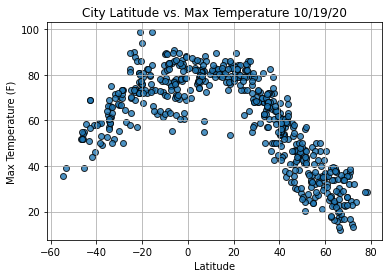

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

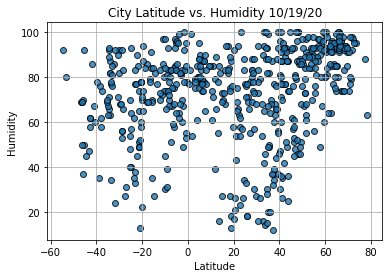

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

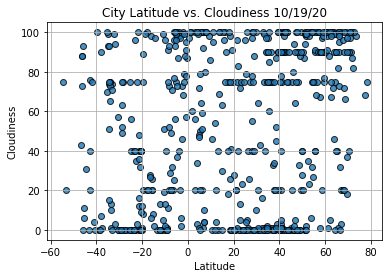

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

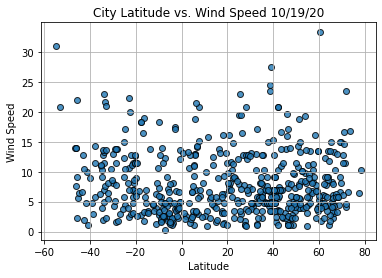

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [29]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [30]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Filipe,CV,2020-10-20 03:03:34,14.90,-24.50,81.63,73,30,1.66
1,Ilulissat,GL,2020-10-20 03:03:07,69.22,-51.10,37.40,94,100,9.17
4,Matara,LK,2020-10-20 03:00:31,5.95,80.54,82.31,74,100,13.04
7,Hambantota,LK,2020-10-20 03:03:14,6.12,81.12,82.40,78,20,6.93
9,Longyearbyen,SJ,2020-10-20 03:03:35,78.22,15.64,28.40,63,75,10.29


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

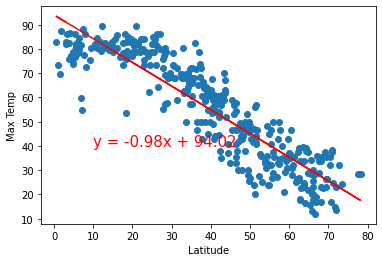

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

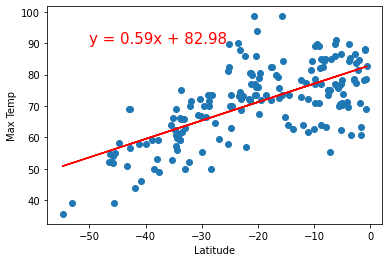

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

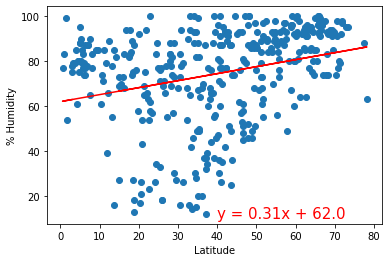

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

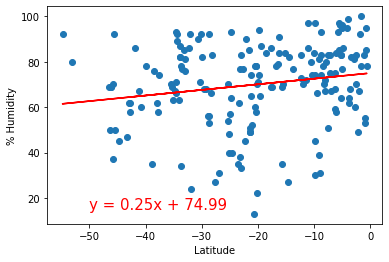

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))